In [1]:
import numpy as np
import tensorflow as tf

from data import create_data_function, prepare_data_natural
from model import (
    simple_model,
    get_train,
    get_val,
    prepare_data_reweighter,
    prepare_data_refiner,
    apply_reweighter,
    apply_refiner,
    resample,
)
from plotting import plot_raw, plot_n_ratio, plot_w, plot_w2, plot_training

In [2]:
output_dir = "results/weight_shape/"
bins = np.arange(0, 3.1, 0.1)

In [3]:
def weight_function(x):
    return (
        0.1
        + 0.5 * ((x > 0) & (x < 0.5))
        + (x - 0.75) * ((x > 0.75) & (x < 1.25))
        + (-x + 1.75) * ((x > 1.25) & (x < 1.75))
        + 2 * (0.5**2 - (x - 2.5) ** 2) * ((x > 2) & (x < 3))
    )

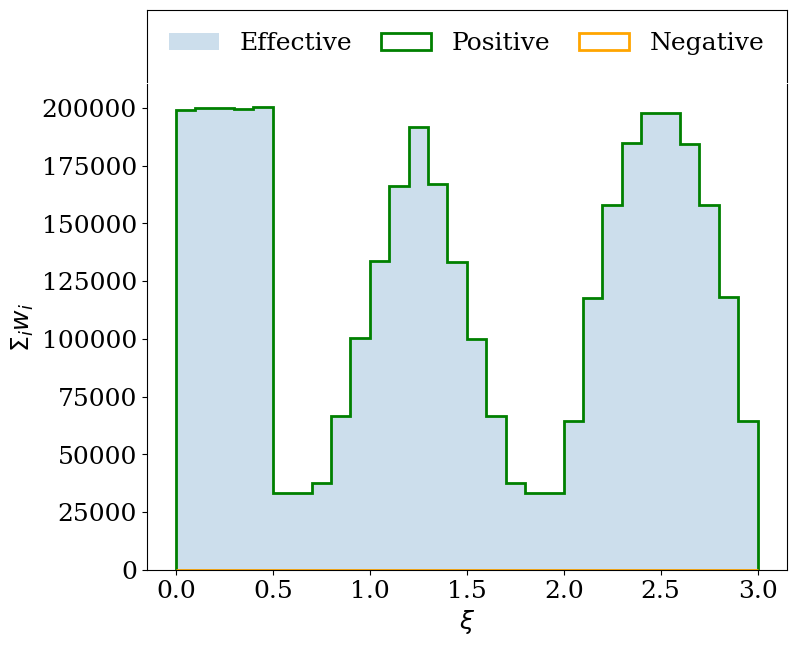

In [4]:
data = pos, neg, pos_weights, neg_weights = create_data_function(10_000_000, function=weight_function)
plot_raw(data=data, bins=bins, path=output_dir + "raw.pdf")

Epoch 1/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 56s 1ms/step - accuracy: 0.5001 - loss: 0.3890 - val_accuracy: 0.5001 - val_loss: 0.3842
Epoch 2/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step - accuracy: 0.5001 - loss: 0.3846 - val_accuracy: 0.5001 - val_loss: 0.3842
Epoch 3/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step - accuracy: 0.5002 - loss: 0.3844 - val_accuracy: 0.5001 - val_loss: 0.3845
Epoch 4/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 56s 1ms/step - accuracy: 0.5003 - loss: 0.3842 - val_accuracy: 0.5001 - val_loss: 0.3844
Epoch 5/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 56s 1ms/step - accuracy: 0.5001 - loss: 0.3842 - val_accuracy: 0.5001 - val_loss: 0.3844


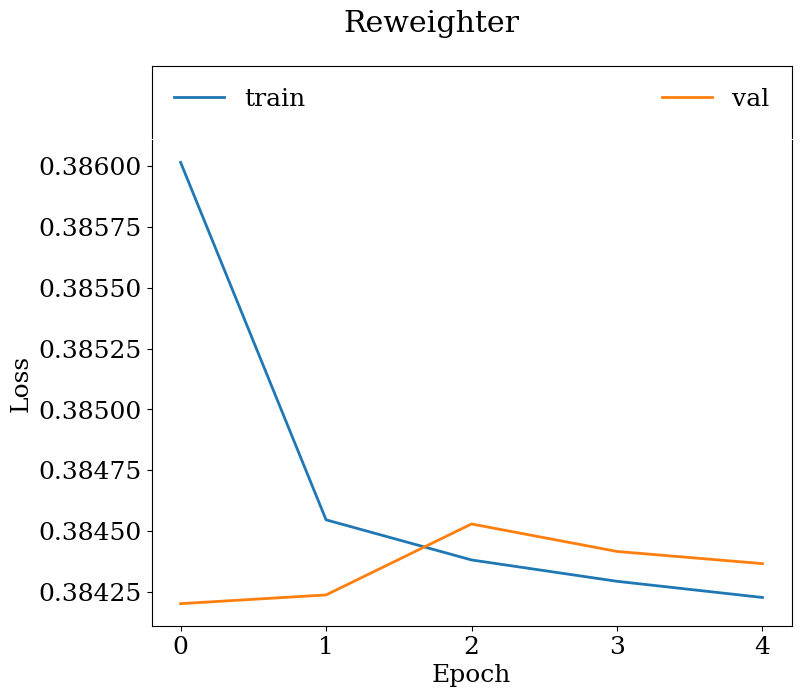

In [ ]:
reweighter = simple_model()
reweighter.compile(optimizer="rmsprop", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train, = get_train(*prepare_data_reweighter(*data))
history_reweighter = reweighter.fit(x_train, y_train, sample_weight=w_train, epochs=5, validation_split=0.2, batch_size=256)
plot_training(history_reweighter, title="Reweighter", path=output_dir + "training_reweighter.pdf")

Epoch 1/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9996 - loss: 8.4776e-04 - val_accuracy: 1.0000 - val_loss: 6.0596e-08
Epoch 2/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 1.0000 - loss: 4.8621e-08 - val_accuracy: 1.0000 - val_loss: 2.8237e-08
Epoch 3/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 1.0000 - loss: 2.4966e-08 - val_accuracy: 1.0000 - val_loss: 1.8202e-08
Epoch 4/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 1.0000 - loss: 1.6707e-08 - val_accuracy: 1.0000 - val_loss: 1.3441e-08
Epoch 5/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 1.0000 - loss: 1.2612e-08 - val_accuracy: 1.0000 - val_loss: 1.0693e-08


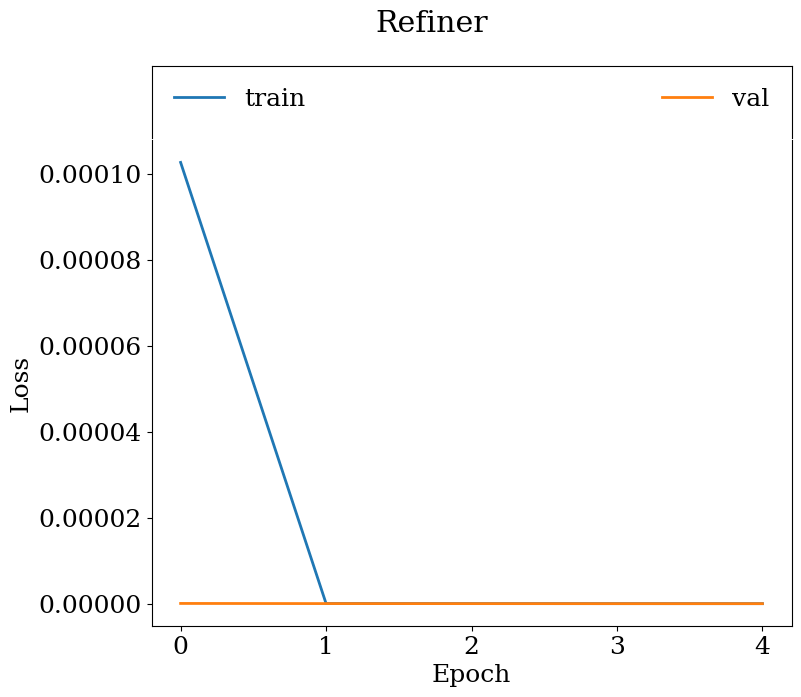

In [6]:
refiner = simple_model()
refiner.compile(optimizer="rmsprop", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train = get_train(*prepare_data_refiner(*data))
history_refiner = refiner.fit(x_train, y_train, sample_weight=w_train, epochs=5, validation_split=0.2, batch_size=256)
plot_training(history_refiner, title="Refiner", path=output_dir + "training_refiner.pdf")

In [7]:
data_natural = get_val(*prepare_data_natural(*data))
data_reweighter = get_val(*apply_reweighter(*data, reweighter=reweighter))
data_refiner = get_val(*apply_refiner(*data, refiner=refiner))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


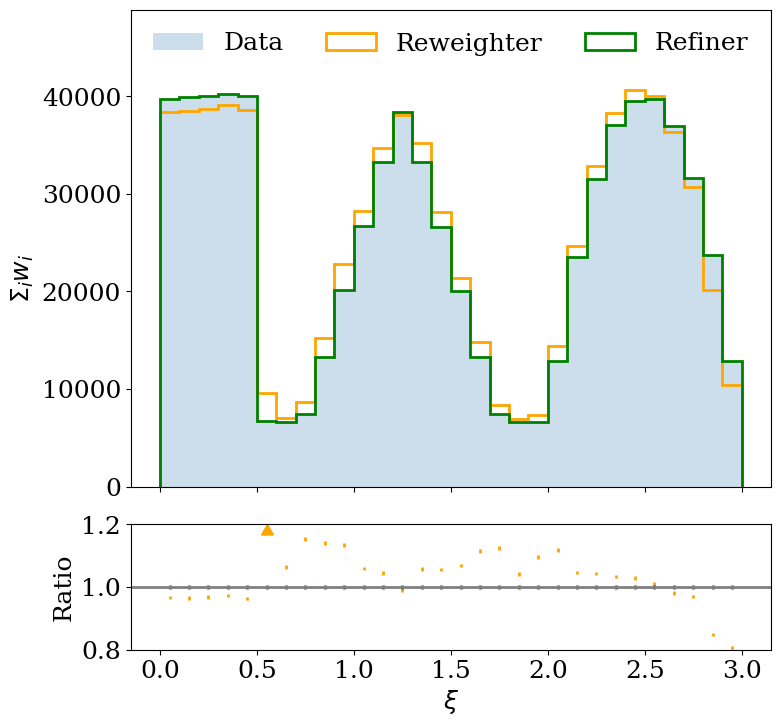

In [8]:
plot_n_ratio(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=bins, path=output_dir + "counts.pdf")

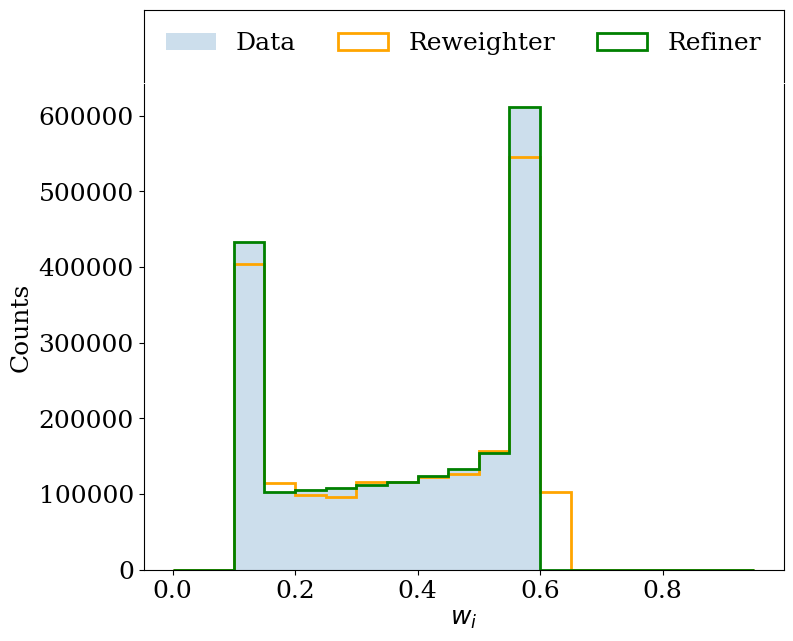

In [9]:
plot_w(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=np.arange(0., 1.0, 0.05), path=output_dir + "weights.pdf")

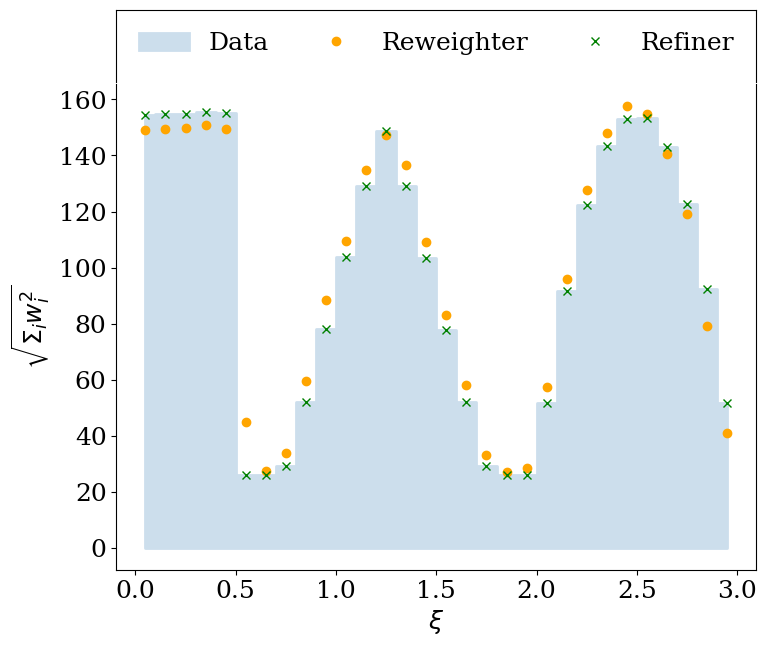

In [10]:
plot_w2(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=bins, path=output_dir + "variances.pdf")